---
## EDA
- Data Analysis
- Data Cleaning
- Modelling
- Review
---

In [678]:
!kaggle competitions download -c spaceship-titanic

100%|█████████████████████████████████████████| 299k/299k [00:00<00:00, 880kB/s]
100%|█████████████████████████████████████████| 299k/299k [00:00<00:00, 878kB/s]


In [679]:
!unzip ./spaceship-titanic.zip -d ./

Archive:  ./spaceship-titanic.zip
  inflating: ./sample_submission.csv  
  inflating: ./test.csv              
  inflating: ./train.csv             


In [680]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [681]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


---
## File and Data Field Descriptions

### train.csv
- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- Fields:
  - PassengerId: A unique Id for each passenger, taking the form gggg_pp, where gggg indicates a group the passenger is travelling with and pp is their number within the group.
  - HomePlanet: The planet the passenger departed from.
  - CryoSleep: Indicates whether the passenger elected to be put into suspended animation.
  - Cabin: The cabin number where the passenger is staying.
  - Destination: The planet the passenger will be debarking to.
  - Age: The age of the passenger.
  - VIP: Whether the passenger has paid for special VIP service during the voyage.
  - RoomService: Amount the passenger has billed at the RoomService.
  - FoodCourt: Amount the passenger has billed at the FoodCourt.
  - ShoppingMall: Amount the passenger has billed at the ShoppingMall.
  - Spa: Amount the passenger has billed at the Spa.
  - VRDeck: Amount the passenger has billed at the VRDeck.
  - Name: The first and last names of the passenger.
  - Transported: Whether the passenger was transported to another dimension.

### test.csv
- Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

### sample_submission.csv
- A submission file in the correct format.
- Fields:
  - PassengerId: A unique Id for each passenger in the test set.
  - Transported: The target, predict either True or False.


---
## Data Cleaning
- Which features are categorical?
- Available data types?
- None, blank or empty values?
---

## Which features are categorical and which are numerical?
---

In [682]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [683]:
print("Categorical Variables\n")
for col in df.select_dtypes(include='object').columns:
    print(col)

Categorical Variables

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [684]:
print("Numerical Variables\n")
for col in df._get_numeric_data().columns:
    print(col)

Numerical Variables

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [685]:
print("Number Of Missing Values\n")
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

Number Of Missing Values

PassengerId: 0
HomePlanet: 201
CryoSleep: 217
Cabin: 199
Destination: 182
Age: 179
VIP: 203
RoomService: 181
FoodCourt: 183
ShoppingMall: 208
Spa: 183
VRDeck: 188
Name: 200
Transported: 0


In [686]:
print("Percentage Of Missing Values\n")
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()/len(df):.3f}%")

Percentage Of Missing Values

PassengerId: 0.000%
HomePlanet: 0.023%
CryoSleep: 0.025%
Cabin: 0.023%
Destination: 0.021%
Age: 0.021%
VIP: 0.023%
RoomService: 0.021%
FoodCourt: 0.021%
ShoppingMall: 0.024%
Spa: 0.021%
VRDeck: 0.022%
Name: 0.023%
Transported: 0.000%


---
## Approaches to handle missing values
- Replace None values with most common value in the column (in the case for categorical variables)
- Remove rows that have None values (not ideal in this case as we drop a significant amount of data)
- Replace the values with the mean or median of the column (in case of numerical variables)
---

In [687]:
for cat_col in df.select_dtypes(include='object').columns:
    if cat_col != "Name":
        df[cat_col].fillna(df[cat_col].mode()[0], inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [688]:
for num_col in df._get_numeric_data().columns:
    df[num_col] = df[num_col].fillna(df[num_col].mean())

In [689]:
print("Number Of Missing Values\n")
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

Number Of Missing Values

PassengerId: 0
HomePlanet: 0
CryoSleep: 0
Cabin: 0
Destination: 0
Age: 0
VIP: 0
RoomService: 0
FoodCourt: 0
ShoppingMall: 0
Spa: 0
VRDeck: 0
Name: 200
Transported: 0


In [690]:
df.drop(['Name'], axis=1, inplace=True)

In [691]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [692]:
df.describe(include='object')

,PassengerId,HomePlanet,Cabin,Destination
count,8693,8693,8693,8693
unique,8693,3,6560,3
top,0001_01,Earth,G/734/S,TRAPPIST-1e
freq,1,4803,207,6097


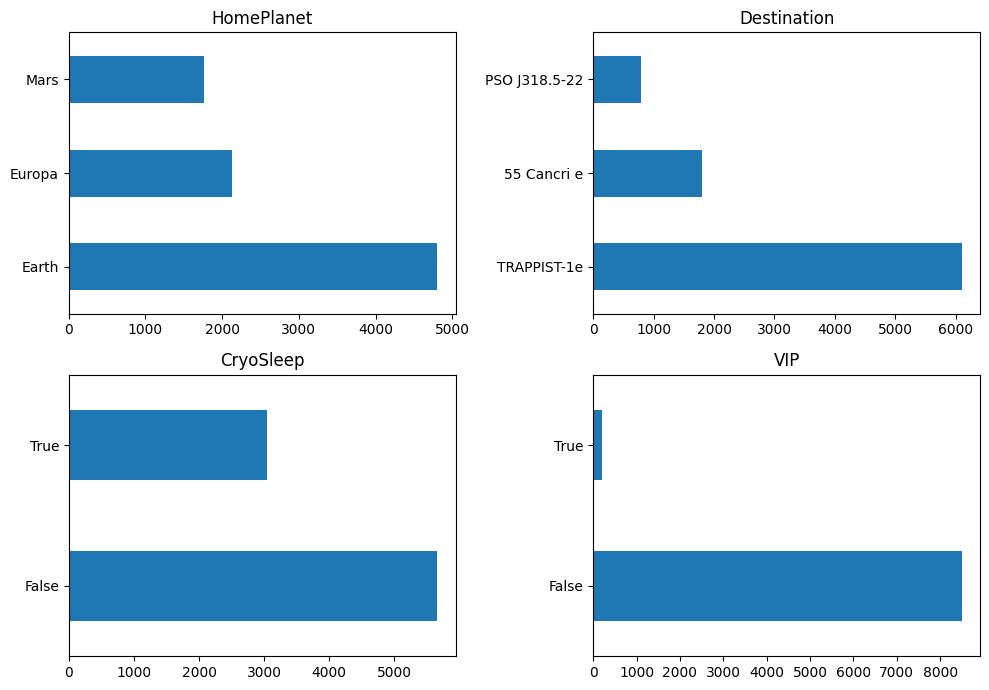

In [693]:
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
df['HomePlanet'].value_counts().plot(kind='barh', title='HomePlanet')
plt.subplot(2, 2, 2)
df['Destination'].value_counts().plot(kind='barh', title='Destination')
plt.subplot(2, 2, 3)
df['CryoSleep'].value_counts().plot(kind='barh', title='CryoSleep')
plt.subplot(2, 2, 4)
df['VIP'].value_counts().plot(kind='barh', title='VIP')
plt.tight_layout()
plt.show()

## Feature Engineering
- Build 2 features from the Cabin column
    - Deck
    - Port


In [694]:
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df['Deck'] = df['Deck'].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df['Port'] = df['Port'].map({'P':0, 'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [695]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [696]:
unique_destinations = df['Destination'].unique()
df['Destination'] = df['Destination'].map(dict(zip(unique_destinations, list(range(len(unique_destinations)))))).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [697]:
df.drop(['PassengerId'], axis=1, inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [698]:
unique_vip = df['VIP'].unique()
df['VIP'] = df['VIP'].map(dict(zip(unique_vip, list(range(len(unique_vip)))))).astype(int)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,False,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,False,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,False,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,False,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,False,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [699]:
unique_cryosleep = df['CryoSleep'].unique()
df['CryoSleep'] = df['CryoSleep'].map(dict(zip(unique_cryosleep, list(range(len(unique_cryosleep)))))).astype(int)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [700]:
df.to_csv('./train_cleaned.csv', index=False)

## Modelling
- Train Test Split Of Our Training Data
- Fit A Few Models: Logistic Regression, Random Forest, Gradient Boosting
- Plot The Results
- Pick The Best Performing Model

In [701]:
df_train = pd.read_csv('train_cleaned.csv')

X = df_train.drop('Transported', axis=1).values
y = df_train['Transported']
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [702]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [703]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred_score = lg.score(X_test, y_test)

/home/rishav/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [704]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred_score = dt.score(X_test, y_test)

In [705]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred_score = knn.score(X_test, y_test)

In [706]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred_score = rf.score(X_test, y_test)

In [707]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred_score = gb.score(X_test, y_test)

In [708]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred_score = svc.score(X_test, y_test)

In [709]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred_score = xgb.score(X_test, y_test)

In [710]:
df = pd.DataFrame(dict(model=['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting', 'SVC', 'XGB'], score=[lg_pred_score, dt_pred_score, knn_pred_score, rf_pred_score, gb_pred_score, svc_pred_score, xgb_pred_score]))
df

,model,score
0,Logistic Regression,0.775158
1,Decision Tree,0.740081
2,KNN,0.765382
3,Random Forest,0.784934
4,Gradient Boosting,0.785509
5,SVC,0.764807
6,XGB,0.785509


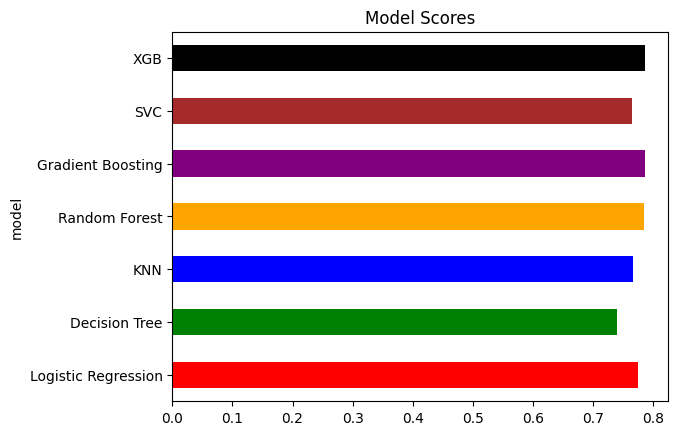

In [711]:
df.plot(kind='barh', x='model', y='score', title='Model Scores', legend=False, color=['red', 'green', 'blue', 'orange', 'purple', 'brown', 'black'])
plt.show()

In [712]:
df = pd.read_csv('./test.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [713]:
print("Number Of Missing Values\n")
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

Number Of Missing Values

PassengerId: 0
HomePlanet: 87
CryoSleep: 93
Cabin: 100
Destination: 92
Age: 91
VIP: 93
RoomService: 82
FoodCourt: 106
ShoppingMall: 98
Spa: 101
VRDeck: 80
Name: 94


In [714]:
for cat_col in df.select_dtypes(include='object').columns:
    if cat_col != "Name":
        df[cat_col].fillna(df[cat_col].mode()[0], inplace=True)

In [715]:
for num_col in df._get_numeric_data().columns:
    df[num_col] = df[num_col].fillna(df[num_col].mean())

In [716]:
print("Number Of Missing Values\n")
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

Number Of Missing Values

PassengerId: 0
HomePlanet: 0
CryoSleep: 0
Cabin: 0
Destination: 0
Age: 0
VIP: 0
RoomService: 0
FoodCourt: 0
ShoppingMall: 0
Spa: 0
VRDeck: 0
Name: 94


In [717]:
df.drop(['Name'], axis=1, inplace=True)

In [718]:
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df['Deck'] = df['Deck'].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df['Port'] = df['Port'].map({'P':0, 'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)

In [719]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
unique_destinations = df['Destination'].unique()
df['Destination'] = df['Destination'].map(dict(zip(unique_destinations, list(range(len(unique_destinations)))))).astype(int)
unique_vip = df['VIP'].unique()
df['VIP'] = df['VIP'].map(dict(zip(unique_vip, list(range(len(unique_vip)))))).astype(int)
unique_cryosleep = df['CryoSleep'].unique()
df['CryoSleep'] = df['CryoSleep'].map(dict(zip(unique_cryosleep, list(range(len(unique_cryosleep)))))).astype(int)

In [720]:
df.to_csv('./test_cleaned.csv', index=False)

In [721]:
df_test = pd.read_csv('./test_cleaned.csv')
df_train = pd.read_csv('./train_cleaned.csv')

In [722]:
X_train = df_train.drop('Transported', axis=1)
y_train = df_train['Transported']
X_test = df_test.drop('PassengerId', axis=1).copy()

In [723]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [724]:
df_submission = pd.DataFrame(dict(PassengerId=df_test['PassengerId'], Transported=y_pred))
df_submission.to_csv('./submission.csv', index=False)

In [725]:
!kaggle competitions submit -c spaceship-titanic -f ./submission.csv -m "SVC"

100%|██████████████████████████████████████| 56.0k/56.0k [00:06<00:00, 9.37kB/s]
Successfully submitted to Spaceship Titanic